In [1]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from time import time

import numpy as np
import numpy as np
np.random.seed(42)

In [2]:
lfw_people_full = fetch_lfw_people(resize = 0.4, download_if_missing=True)

In [3]:
min_faces_threshold =  70

In [4]:
lfw_people = fetch_lfw_people(min_faces_per_person = min_faces_threshold, resize=0.4)

In [5]:
n_samples, h, w = lfw_people.images.shape

X = lfw_people.data
n_features = X.shape[1]

y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]


print("Number of Data Samples: %d" % n_samples)
print("Size of a data sample: %d" % n_features)
print("Number of Class Labels: %d" % n_classes)

print("\nTarget Names (Class Labels):")
for name in target_names:
    print(name)

Number of Data Samples: 1288
Size of a data sample: 1850
Number of Class Labels: 7

Target Names (Class Labels):
Ariel Sharon
Colin Powell
Donald Rumsfeld
George W Bush
Gerhard Schroeder
Hugo Chavez
Tony Blair


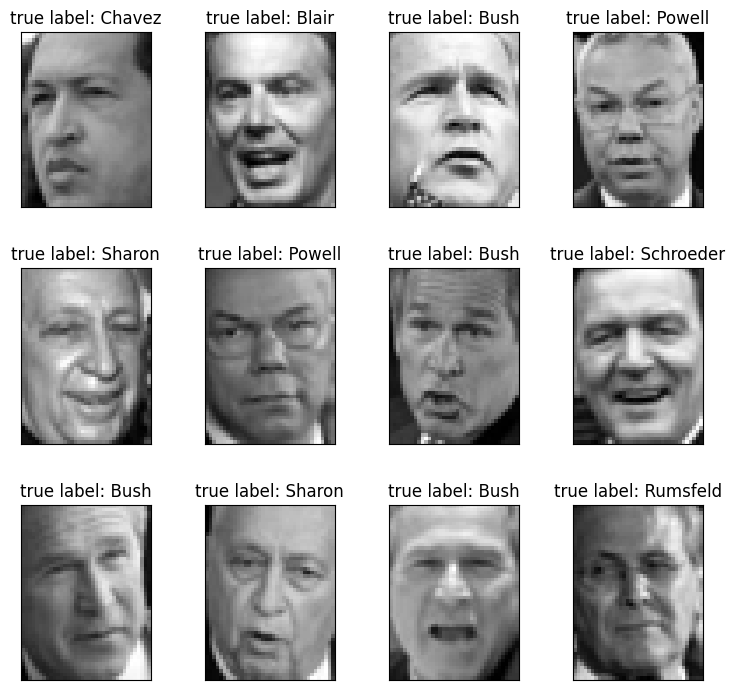

In [6]:

# Function to plot images in a 3 x 4 grid
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Plots a gallery of images with titles."""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    
    for i in range(n_row * n_col):
        if i >= len(images):  # Prevent index error if not enough images
            break
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

# Generate titles based on true labels
def true_title(Y, target_names, i):
    """Generates the true label title for an image."""
    true_name = target_names[Y[i]].rsplit(' ', 1)[-1]  # Extract last name
    return f'true label: {true_name}'

# Generate true titles for the images
true_titles = [true_title(y, target_names, i) for i in range(y.shape[0])]

# Plot a subset of the images (first 12, for example)
plot_gallery(X[:12], true_titles[:12], h, w)
plt.show()


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
print("size of training data set is %d and testing data is %d" %(y_train.shape[0], y_test.shape[0]))


size of training data set is 966 and testing data is 322


In [8]:

n_components = 149

pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True, random_state=42)


print("Fitting PCA to the training data...")
t0 = time()
pca.fit(X_train)
print(f"PCA fitting done in {time() - t0:.3f} seconds.")

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data onto the eigenfaces basis...")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(f"Projection done in {time() - t0:.3f} seconds.")


Fitting PCA to the training data...
PCA fitting done in 1.116 seconds.
Projecting the input data onto the eigenfaces basis...
Projection done in 0.057 seconds.


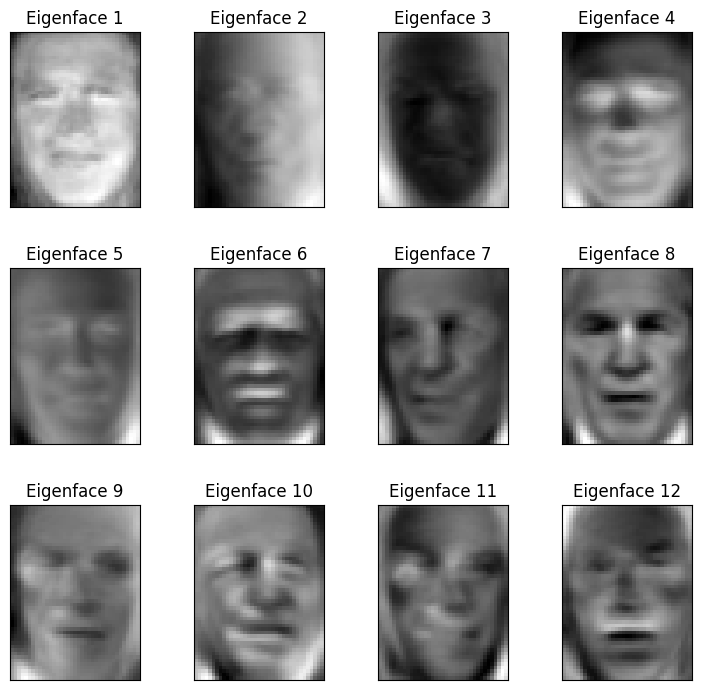

In [9]:
import matplotlib.pyplot as plt

# Display the first 12 eigenfaces
def plot_eigenfaces(eigenfaces, h, w, n_row=3, n_col=4):
    
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(eigenfaces[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(f"Eigenface {i+1}", size=12)
        plt.xticks(())
        plt.yticks(())

# Plot the first 12 eigenfaces
plot_eigenfaces(eigenfaces, h, w)
plt.show()


In [10]:
print("data point after applying pca\n", X_train_pca[0])

print("Dimensions of training set = % s and test set = %s"%(X_train.shape, X_test.shape))

data point after applying pca
 [ 1.34971631e+00  1.01670158e+00  1.77009571e+00  5.38247168e-01
  8.99654925e-01  4.25234675e-01 -9.11529899e-01 -9.90221143e-01
  4.92796868e-01 -4.86033298e-02 -4.28213850e-02 -5.75879216e-01
  2.45909333e-01 -3.91520374e-03 -2.77397037e+00 -3.74704748e-01
 -1.60690975e+00  2.77530050e+00 -3.97334671e+00 -1.28512120e+00
 -1.21285267e-01  2.39109918e-02 -9.60407972e-01 -3.21868122e-01
 -3.53226244e-01 -1.29799056e+00  3.34868133e-01 -9.99493822e-02
 -2.63017297e+00  1.19461596e+00 -8.73654842e-01 -1.05748475e-01
  7.64808655e-01  2.11504579e+00  1.33602452e+00  1.09944654e+00
 -3.58541965e-01  2.23081851e+00  5.17767429e-01 -1.77237785e+00
  6.69465482e-01 -4.96658057e-01  1.18900561e+00  2.20815063e-01
 -1.95661211e+00  1.16982067e+00  7.84799278e-01  8.96050215e-01
  2.17364907e+00  1.93238747e+00  4.45470428e+00  8.14541206e-02
  1.55920339e+00  2.14791584e+00  1.10000372e+00 -1.69482455e-01
 -1.58403385e+00  1.25170732e+00 -1.34560198e-01 -9.2092776

In [ ]:
print("applying classifier on training set")

t0 = time()
param_grid = {
    'C': [1e3, 2e3, 5e3, 8e3, 1e4, 2e4, 5e4, 8e4, 1e5],
    'gamma': [0.0001, 0.0003, 0.0005, 0.0008, 0.001, 0.005, 0.01]
}

clf = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced', random_state=42),
    param_grid
)
clf = clf.fit(X_train_pca, y_train)
print("done in % 0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)


applying classifier on training set


In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')

plt.title("Cumulative Explained Variance", fontsize=16)
plt.xlabel("Number of Components", fontsize=14)
plt.ylabel("Explained Variance Ratio", fontsize=14)
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Explained Variance")
plt.axvline(x=n_components, color='g', linestyle='--', label=f"{n_components} Components")
plt.legend(loc="best")
plt.grid(axis='y')

plt.show()

In [ ]:
print()
t0 = time()
y_pred = clf.predict(X_test_pca)
print(classification_report(y_test, y_pred, target_names = target_names))
# print confusion 
print("Confusion Matrix is:")
print(confusion_matrix(y_test, y_pred, labels = range(n_classes)))



In [ ]:
def display_image_with_labels(image, true_label, predicted_label, target_names, h, w):
    """Display a single image with its true and predicted labels."""
    plt.imshow(image.reshape((h, w)), cmap=plt.cm.gray)
    plt.title(f"True: {target_names[true_label]}\nPred: {target_names[predicted_label]}", size=12)
    plt.xticks(())
    plt.yticks(())

# Keep track of displayed classes
displayed_classes = set()

plt.figure(figsize=(12, 8))

# Loop through the test set to find one image for each class
for i in range(len(y_test)):
    true_label = y_test[i]
    predicted_label = y_pred[i]

    # Check if we have already displayed an example for this class
    if true_label not in displayed_classes:
        plt.subplot(3, 4, len(displayed_classes) + 1)
        display_image_with_labels(X_test[i], true_label, predicted_label, target_names, h, w)
        displayed_classes.add(true_label)

    # Stop if we've displayed an example for all classes
    if len(displayed_classes) == len(target_names):
        break

plt.tight_layout()
plt.show()